# Random Forest Classifier using Scikit-learn


The Random forest classifier creates a set of decision trees from a randomly selected subset of the training set. It is basically a set of decision trees (DT) from a randomly selected subset of the training set and then It collects the votes from different decision trees to decide the final prediction.

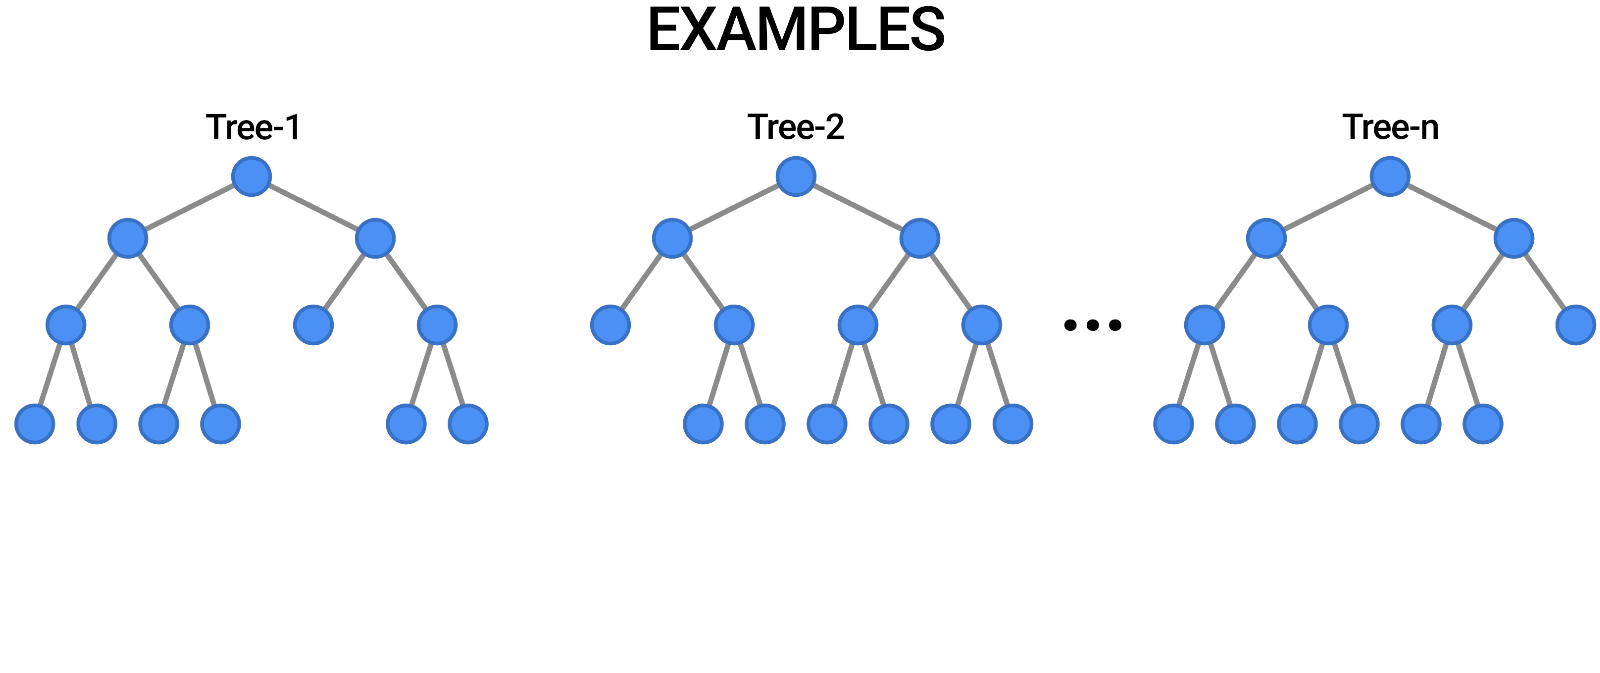

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np

In [2]:
# Data Load from s3 Bucket. Data Location: s3://bing1219/sim1.csv

df = pd.read_csv("s3://bing1219/sim1.csv")
df

,Time,BS_ID,BS_LOC_X,BS_LOC_Y,ANT_ID,ANT_SEC,TRX_ID,TRX_X,TRX_Y,TRX_ANG,...,UE_LOC_Y,MAX_DR_(bits),DEMAND_DR_(bits),REAL_DR_(bits),BS_Trans_PWR_(W),UE_Rec_PWR_(W),RSRP_(dBm),RSSI_(dBm),RSRQ_(dB),DDR_(%)
0,0,0,0.0000,0,0,0,99,0.2500,0.38700,0,...,3.185660,146,68,68,2.700000e-12,2.250000e-12,-86.4780,-55.6862,-10.7918,0.0
1,0,0,0.0000,0,0,0,98,0.2500,-0.38700,0,...,-3.746920,152,104,104,3.630000e-12,3.030000e-12,-85.1879,-54.3961,-10.7918,0.0
2,0,0,0.0000,0,0,0,97,0.2500,0.37926,0,...,2.572930,152,110,110,3.550000e-12,2.960000e-12,-85.2853,-54.4935,-10.7918,0.0
3,0,0,0.0000,0,0,0,96,0.2500,-0.37926,0,...,2.934360,135,31,31,1.440000e-12,1.200000e-12,-89.2190,-58.4272,-10.7918,0.0
4,0,0,0.0000,0,0,0,95,0.2500,0.37152,0,...,0.307584,160,25,25,1.870000e-11,1.560000e-11,-78.0631,-47.2713,-10.7918,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178995,999,2,17.3205,-10,2,240,88,16.8939,-10.04240,0,...,-1.559620,109,55,55,5.800000e-13,4.830000e-13,-93.1612,-62.3694,-10.7918,0.0
178996,999,2,17.3205,-10,2,240,87,17.4904,-10.38680,0,...,-11.473800,160,116,116,1.830000e-11,1.520000e-11,-78.1700,-47.3782,-10.7918,0.0
178997,999,2,17.3205,-10,2,240,86,16.9006,-10.04620,0,...,-4.819940,108,75,75,5.610000e-13,4.670000e-13,-93.3024,-62.5106,-10.7918,0.0
178998,999,2,17.3205,-10,2,240,85,17.4837,-10.38290,0,...,-12.707500,140,85,85,2.150000e-12,1.790000e-12,-87.4623,-56.6705,-10.7918,0.0


In [3]:
# select only 3 columns like: RSRP , RSSI, RSRQ 
X = df[['RSRP_(dBm)', 'RSSI_(dBm)', 'RSRQ_(dB)']]

In [4]:
# The Python abs() function return the absolute value and remove the negative sign of a number in
data = X.abs()

## Formulas to Calculate the RSRP, RSSI, RSRQ

. 2 is define for strong signal

. 1 is define for medium signal

. 0 is define for week signal

In [5]:
conditions = [
    (data['RSRP_(dBm)'] <= 80),
    (data['RSRP_(dBm)'] > 80) & (data['RSRP_(dBm)'] < 90),
    (data['RSRP_(dBm)'] > 90) & (data['RSRP_(dBm)'] < 100),
    ]
values = [2, 1, 0]
data['RSRP_bandwith'] = np.select(conditions, values)


In [6]:
conditions2 = [
    (df['RSSI_(dBm)'] <= 70),
    (df['RSSI_(dBm)'] > 70) & (df['RSSI_(dBm)'] < 85),
    (df['RSSI_(dBm)'] > 85) & (df['RSSI_(dBm)'] < 100),
    ]

values = [2, 1, 0] 
data['RSSI_bandwith'] = np.select(conditions2, values)

In [7]:
conditions = [
    (df['RSRQ_(dB)'] <= 10),
    (df['RSRQ_(dB)'] > 10) & (df['RSRQ_(dB)'] < 15),
    (df['RSRQ_(dB)'] > 15) & (df['RSRQ_(dB)'] < 20),
    ]
values = [2, 1, 0]
data['RSRQ_bandwith'] = np.select(conditions, values)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179000 entries, 0 to 178999
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   RSRP_(dBm)     179000 non-null  float64
 1   RSSI_(dBm)     179000 non-null  float64
 2   RSRQ_(dB)      179000 non-null  float64
 3   RSRP_bandwith  179000 non-null  int64  
 4   RSSI_bandwith  179000 non-null  int64  
 5   RSRQ_bandwith  179000 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 8.2 MB


In [9]:
data.isnull().sum()

RSRP_(dBm)       0
RSSI_(dBm)       0
RSRQ_(dB)        0
RSRP_bandwith    0
RSSI_bandwith    0
RSRQ_bandwith    0
dtype: int64

## Splitting Trian and Test Data

In [14]:
X

,RSRP_(dBm),RSSI_(dBm),RSRQ_(dB)
0,-86.4780,-55.6862,-10.7918
1,-85.1879,-54.3961,-10.7918
2,-85.2853,-54.4935,-10.7918
3,-89.2190,-58.4272,-10.7918
4,-78.0631,-47.2713,-10.7918
...,...,...,...
178995,-93.1612,-62.3694,-10.7918
178996,-78.1700,-47.3782,-10.7918
178997,-93.3024,-62.5106,-10.7918
178998,-87.4623,-56.6705,-10.7918


In [10]:
data = data.sample(frac=1, random_state=42)
data1 = data.copy()
y = data1[['RSRP_bandwith', 'RSSI_bandwith', 'RSRQ_bandwith']]
y

,RSRP_bandwith,RSSI_bandwith,RSRQ_bandwith
97877,0,2,2
170143,2,2,2
36446,1,2,2
7492,2,2,2
153444,1,2,2
...,...,...,...
119879,0,2,2
103694,0,2,2
131932,2,2,2
146867,1,2,2


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
train_data, val_data = train_test_split(data, test_size=0.01)

In [13]:
print(train_data.shape)
print(val_data.shape)

(177210, 6)
(1790, 6)


## Data Save in csv file

In [28]:
train_data.to_csv('sagemaker_training_dataset.csv', index=False)
val_data.to_csv('sagemaker_validation_dataset.csv', index=False)

## Store Data in s3

In [1]:
import sagemaker

print(sagemaker.__version__)

sess = sagemaker.Session()
bucket = sess.default_bucket()

prefix = 'RandomForest_prefix'
training_data_path = sess.upload_data(path='sagemaker_training_dataset.csv', key_prefix=prefix + '/input/training')
validation_data_path = sess.upload_data(path='sagemaker_validation_dataset.csv', key_prefix=prefix + '/input/validation')
output   = 's3://{}/{}/output/'.format(bucket,prefix)
print(training_data_path)
print(validation_data_path)
print(output)

2.110.0
s3://sagemaker-us-east-1-811710284692/RandomForest_prefix/input/training/sagemaker_training_dataset.csv
s3://sagemaker-us-east-1-811710284692/RandomForest_prefix/input/validation/sagemaker_validation_dataset.csv
s3://sagemaker-us-east-1-811710284692/RandomForest_prefix/output/


## Training job

### Use Sagmaker SKLearn Frame work

You can use Amazon SageMaker to train and deploy a model using custom Scikit-learn code. The SageMaker Python SDK Scikit-learn estimators and models and the SageMaker open-source Scikit-learn containers make writing a Scikit-learn script and running it in SageMaker easier.

In [30]:
from sagemaker.sklearn import SKLearn
role = sagemaker.get_execution_role()
#role = 'arn:aws:iam::0123456789012:role/Sagemaker-fullaccess'
hyperparameters = {
    "random_state": 0,
    "n_estimators": 100,
}

sk = SKLearn(entry_point='train_rf.py', 
                          role=role,
                          instance_count=1, 
                          instance_type='ml.m5.xlarge',
                          framework_version='0.20.0',                         
                          script_mode=True,
                          output_path=output,
                          hyperparameters = hyperparameters)

In [31]:
sk.fit({'training':training_data_path, 'validation':validation_data_path})

2022-10-17 09:28:15 Starting - Starting the training job...
2022-10-17 09:28:38 Starting - Preparing the instances for trainingProfilerReport-1665998895: InProgress
.........
2022-10-17 09:29:58 Downloading - Downloading input data...
2022-10-17 09:30:38 Training - Downloading the training image..2022-10-17 09:30:57,248 sagemaker-containers INFO     Imported framework sagemaker_sklearn_container.training
2022-10-17 09:30:57,251 sagemaker-training-toolkit INFO     No GPUs detected (normal if no gpus installed)
2022-10-17 09:30:57,259 sagemaker_sklearn_container.training INFO     Invoking user training script.
2022-10-17 09:30:57,646 sagemaker-training-toolkit INFO     No GPUs detected (normal if no gpus installed)
2022-10-17 09:30:57,660 sagemaker-training-toolkit INFO     No GPUs detected (normal if no gpus installed)
2022-10-17 09:30:57,675 sagemaker-training-toolkit INFO     No GPUs detected (normal if no gpus installed)
2022-10-17 09:30:57,683 sagemaker-training-toolkit INFO     Inv

# Sagemaker Endpoint

In [27]:
from time import strftime, gmtime
timestamp = strftime('%d-%H-%M-%S', gmtime())

endpoint_name = 'randomForest-model-'+timestamp
print(endpoint_name)

randomForest-model-16-07-10-58


In [29]:
# Deploy Model in Sagemkaer instance:ml.t2.medium

rf_predictor = sk.deploy(endpoint_name=endpoint_name, 
                        initial_instance_count=1, 
                        instance_type='ml.t2.medium')

----------!

# Prepare Test Data

In [30]:
# Load some samples, drop labels, and one-hot encode
payload = val_data[:10].drop(['RSRP_bandwith' , 'RSSI_bandwith' , 'RSRQ_bandwith'], axis=1)
payload = payload.to_csv(header=False,index=False).rstrip('\n')
print(payload)

93.6321,62.8403,10.7918
93.0268,62.235,10.7918
77.6234,46.8316,10.7918
93.6984,62.9066,10.7918
93.3209,62.529,10.7918
89.4211,58.6293,10.7918
85.1451,54.3533,10.7918
82.7506,51.9588,10.7918
92.7269,61.9351,10.7918
78.7553,47.9635,10.7918


# prediction

In [31]:
rf_predictor.serializer = sagemaker.serializers.CSVSerializer()
rf_predictor.deserializer = sagemaker.deserializers.CSVDeserializer()

response = rf_predictor.predict(payload)

print(response)

[['0', '2', '2'], ['0', '2', '2'], ['2', '2', '2'], ['0', '2', '2'], ['0', '2', '2'], ['1', '2', '2'], ['1', '2', '2'], ['1', '2', '2'], ['0', '2', '2'], ['2', '2', '2']]


In [33]:
y_true = val_data[['RSRP_bandwith', 'RSSI_bandwith' ,'RSRQ_bandwith']]
y_true.head(10)

,RSRP_bandwith,RSSI_bandwith,RSRQ_bandwith
141057,0,2,2
27878,0,2,2
164943,2,2,2
108346,0,2,2
53594,0,2,2
90491,1,2,2
33691,1,2,2
169812,1,2,2
33005,0,2,2
80020,2,2,2


# Delete Endpoint

In [34]:
rf_predictor.delete_endpoint()